In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/CLASES 2024/Python Programming/pdp_group8.zip"

Archive:  /content/drive/MyDrive/CLASES 2024/Python Programming/pdp_group8.zip
  inflating: pdp_group8/README.txt   
   creating: pdp_group8/WebScraping/
  inflating: pdp_group8/WebScraping/airports.txt  
  inflating: pdp_group8/WebScraping/amsterdam.csv  
  inflating: pdp_group8/WebScraping/barcelona.csv  
  inflating: pdp_group8/WebScraping/dates.txt  
  inflating: pdp_group8/WebScraping/dublin.csv  
  inflating: pdp_group8/WebScraping/frankfurt.csv  
  inflating: pdp_group8/WebScraping/istanbul.csv  
  inflating: pdp_group8/WebScraping/london.csv  
  inflating: pdp_group8/WebScraping/madrid.csv  
  inflating: pdp_group8/WebScraping/munich.csv  
  inflating: pdp_group8/WebScraping/paris.csv  
  inflating: pdp_group8/WebScraping/rome.csv  
  inflating: pdp_group8/WebScraping/script.ipynb  
  inflating: pdp_group8/WebScraping/script.py  


In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

In [4]:
# Path to the directory containing CSV files
directory = '/content/pdp_group8/WebScraping/'

dataframes = {}

# Iterate over files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(directory, filename))
        dataframes[filename] = df

print("Loaded CSV files:")
for filename in dataframes.keys():
    print(filename)


Loaded CSV files:
frankfurt.csv
dublin.csv
munich.csv
paris.csv
barcelona.csv
istanbul.csv
amsterdam.csv
madrid.csv
london.csv
rome.csv


In [5]:
dataframes['dublin.csv']

,Carrier,DepTime,ArrTime,Price,Duration,Day,DepAirport,ArrAirport,DayAfter
0,British Airways,19:30,20:50,$75,1h 20m,2024-04-19,Dublin,London,False
1,Aer Lingus,18:00,19:25,$67,1h 25m,2024-04-19,Dublin,London,False
2,Aer Lingus,20:15,21:35,$65,1h 20m,2024-04-19,Dublin,London,False
3,Aer Lingus,17:30,18:55,$76,1h 25m,2024-04-19,Dublin,London,False
4,Aer Lingus,7:30,9:05,$95,1h 35m,2024-04-19,Dublin,London,False
...,...,...,...,...,...,...,...,...,...
3544,KLM,17:20,22:25,$205,4h 05m,2025-03-19,Dublin,Frankfurt,False
3545,KLM,5:55,11:05,$205,4h 10m,2025-03-19,Dublin,Frankfurt,False
3546,KLM,13:25,22:25,$116,8h 00m,2025-03-19,Dublin,Frankfurt,False
3547,KLM,8:50,17:15,$169,7h 25m,2025-03-19,Dublin,Frankfurt,False


In [6]:
all_flights_df = pd.concat(dataframes.values(), ignore_index=True)
all_flights_df

,Carrier,DepTime,ArrTime,Price,Duration,Day,DepAirport,ArrAirport,DayAfter
0,KLM,17:55,20:55,$156,4h 00m,2024-05-19,Frankfurt,London,False
1,Lufthansa,21:30,22:10,$122,1h 40m,2024-05-19,Frankfurt,London,False
2,BlaBlaBus,12:00,7:05,$66,20h 05m,2024-05-19,Frankfurt,London,True
3,Lufthansa,18:00,18:40,$136,1h 40m,2024-05-19,Frankfurt,London,False
4,Lufthansa,17:00,17:40,$145,1h 40m,2024-05-19,Frankfurt,London,False
...,...,...,...,...,...,...,...,...,...
41781,WestJet,14:40,10:55,"$1,018",21h 15m,2024-08-19,Rome,Dublin,True
41782,American Airlines,12:10,6:15,"$1,234",19h 05m,2024-08-19,Rome,Dublin,True
41783,Emirates,22:10,12:15,"$1,463",15h 05m,2024-08-19,Rome,Dublin,True
41784,United Airlines,12:55,7:05,"$3,355",19h 10m,2024-08-19,Rome,Dublin,True


# Preprocessing
Cleaning Carrier Names:
*  Change Carrier name to all uppercase
*  Repeated names: names of the same airline but different branch would be treated as the same airline (e.g. Wizz Air, Wizz Air UK, Wizz Air Brussles --> Wizz Air).
*  Cleaning Price text to Numerical
*  Given the limitations of our data for Carrier Price Analysis we would count connections as two duplicated trips.
*  There are some companies in the Carrier column that don't correspond to an Airline service like, 'ALSA', 'RENFE', UNION Ivkoni'. To the best of our knowledge we will elimate those that are not truly airlines
* Duration Column: The results of this column has some entrees that don't seem consistent with the actual duration.
* Calculate a new Duration column with the DepTime and ArrTime.

In [7]:
all_flights_df.drop(columns=['Duration'], inplace=True)

In [8]:
all_flights_df

,Carrier,DepTime,ArrTime,Price,Day,DepAirport,ArrAirport,DayAfter
0,KLM,17:55,20:55,$156,2024-05-19,Frankfurt,London,False
1,Lufthansa,21:30,22:10,$122,2024-05-19,Frankfurt,London,False
2,BlaBlaBus,12:00,7:05,$66,2024-05-19,Frankfurt,London,True
3,Lufthansa,18:00,18:40,$136,2024-05-19,Frankfurt,London,False
4,Lufthansa,17:00,17:40,$145,2024-05-19,Frankfurt,London,False
...,...,...,...,...,...,...,...,...
41781,WestJet,14:40,10:55,"$1,018",2024-08-19,Rome,Dublin,True
41782,American Airlines,12:10,6:15,"$1,234",2024-08-19,Rome,Dublin,True
41783,Emirates,22:10,12:15,"$1,463",2024-08-19,Rome,Dublin,True
41784,United Airlines,12:55,7:05,"$3,355",2024-08-19,Rome,Dublin,True


In [9]:
all_flights_df['Carrier'] = all_flights_df['Carrier'].str.upper()
all_flights_df['Carrier'].unique()

array(['KLM', 'LUFTHANSA', 'BLABLABUS', 'BRITISH AIRWAYS', 'SWISS',
       'AUSTRIAN AIRLINES', 'REGIOJET, BRITISH AIRWAYS',
       'LUFTHANSA, EUROWINGS', 'BRUSSELS AIRLINES', 'LUFTHANSA, VUELING',
       'LUFTHANSA, BRITISH AIRWAYS', 'DEUTSCHE BAHN, EUROWINGS',
       'AER LINGUS', 'LUFTHANSA, SWISS', 'SCANDINAVIAN AIRLINES',
       'AIR DOLOMITI, SWISS', 'LUFTHANSA, AUSTRIAN AIRLINES', 'FINNAIR',
       'AIR FRANCE', 'LOT', 'UNION IVKONI', 'IBERIA',
       'IBERIA, BRITISH AIRWAYS', 'CROATIA AIRLINES',
       'AIR DOLOMITI, BRITISH AIRWAYS', 'LUFTHANSA, AER LINGUS',
       'LUFTHANSA, CHINA EASTERN', 'AER LINGUS, BRITISH AIRWAYS',
       'LUFTHANSA, SCANDINAVIAN AIRLINES', 'LUFTHANSA, BRUSSELS AIRLINES',
       'ITA AIRWAYS, BRITISH AIRWAYS', 'LUFTHANSA, IBERIA',
       'AIR DOLOMITI, EASYJET', 'ITA AIRWAYS',
       'SCANDINAVIAN AIRLINES, NORWEGIAN', 'LUFTHANSA, EASYJET',
       'LUFTHANSA, LUXAIR', 'LUFTHANSA, LOT', 'LUFTHANSA, ITA AIRWAYS',
       'LOT, EASYJET', 'LUFTHANSA, EURO

In [10]:
all_flights_df['Day'] = pd.to_datetime(all_flights_df['Day'])

all_flights_df['DepTime'] = pd.to_datetime(all_flights_df['Day'].astype(str) + ' ' + all_flights_df['DepTime'])
all_flights_df['ArrTime'] = pd.to_datetime(all_flights_df['Day'].astype(str) + ' ' + all_flights_df['ArrTime'])

all_flights_df['DayAfter'] = all_flights_df['DayAfter'].astype(int)

all_flights_df['ArrivalDay'] = all_flights_df['Day'] + pd.to_timedelta(all_flights_df['DayAfter'], unit='D')

all_flights_df['Duration'] = (all_flights_df['ArrTime'] + pd.to_timedelta(all_flights_df['DayAfter'], unit='D') - all_flights_df['DepTime']).dt.total_seconds() / 60

print(all_flights_df)


                 Carrier             DepTime             ArrTime   Price  \
0                    KLM 2024-05-19 17:55:00 2024-05-19 20:55:00    $156   
1              LUFTHANSA 2024-05-19 21:30:00 2024-05-19 22:10:00    $122   
2              BLABLABUS 2024-05-19 12:00:00 2024-05-19 07:05:00     $66   
3              LUFTHANSA 2024-05-19 18:00:00 2024-05-19 18:40:00    $136   
4              LUFTHANSA 2024-05-19 17:00:00 2024-05-19 17:40:00    $145   
...                  ...                 ...                 ...     ...   
41781            WESTJET 2024-08-19 14:40:00 2024-08-19 10:55:00  $1,018   
41782  AMERICAN AIRLINES 2024-08-19 12:10:00 2024-08-19 06:15:00  $1,234   
41783           EMIRATES 2024-08-19 22:10:00 2024-08-19 12:15:00  $1,463   
41784    UNITED AIRLINES 2024-08-19 12:55:00 2024-08-19 07:05:00  $3,355   
41785    UNITED AIRLINES 2024-08-19 10:05:00 2024-08-19 07:05:00  $3,315   

             Day DepAirport ArrAirport  DayAfter ArrivalDay  Duration  
0     2024-05-1

In [11]:
all_flights_df

,Carrier,DepTime,ArrTime,Price,Day,DepAirport,ArrAirport,DayAfter,ArrivalDay,Duration
0,KLM,2024-05-19 17:55:00,2024-05-19 20:55:00,$156,2024-05-19,Frankfurt,London,0,2024-05-19,180.0
1,LUFTHANSA,2024-05-19 21:30:00,2024-05-19 22:10:00,$122,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
2,BLABLABUS,2024-05-19 12:00:00,2024-05-19 07:05:00,$66,2024-05-19,Frankfurt,London,1,2024-05-20,1145.0
3,LUFTHANSA,2024-05-19 18:00:00,2024-05-19 18:40:00,$136,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
4,LUFTHANSA,2024-05-19 17:00:00,2024-05-19 17:40:00,$145,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
...,...,...,...,...,...,...,...,...,...,...
41781,WESTJET,2024-08-19 14:40:00,2024-08-19 10:55:00,"$1,018",2024-08-19,Rome,Dublin,1,2024-08-20,1215.0
41782,AMERICAN AIRLINES,2024-08-19 12:10:00,2024-08-19 06:15:00,"$1,234",2024-08-19,Rome,Dublin,1,2024-08-20,1085.0
41783,EMIRATES,2024-08-19 22:10:00,2024-08-19 12:15:00,"$1,463",2024-08-19,Rome,Dublin,1,2024-08-20,845.0
41784,UNITED AIRLINES,2024-08-19 12:55:00,2024-08-19 07:05:00,"$3,355",2024-08-19,Rome,Dublin,1,2024-08-20,1090.0


In [12]:
all_flights_df['Carrier'].nunique()

834

In [13]:
#Divide Connecting flights to separte flights
#The result is two identical flights with different Carrier

all_carriers = all_flights_df.assign(Carrier=all_flights_df['Carrier'].str.split(', ')).explode('Carrier')
all_carriers

,Carrier,DepTime,ArrTime,Price,Day,DepAirport,ArrAirport,DayAfter,ArrivalDay,Duration
0,KLM,2024-05-19 17:55:00,2024-05-19 20:55:00,$156,2024-05-19,Frankfurt,London,0,2024-05-19,180.0
1,LUFTHANSA,2024-05-19 21:30:00,2024-05-19 22:10:00,$122,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
2,BLABLABUS,2024-05-19 12:00:00,2024-05-19 07:05:00,$66,2024-05-19,Frankfurt,London,1,2024-05-20,1145.0
3,LUFTHANSA,2024-05-19 18:00:00,2024-05-19 18:40:00,$136,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
4,LUFTHANSA,2024-05-19 17:00:00,2024-05-19 17:40:00,$145,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
...,...,...,...,...,...,...,...,...,...,...
41781,WESTJET,2024-08-19 14:40:00,2024-08-19 10:55:00,"$1,018",2024-08-19,Rome,Dublin,1,2024-08-20,1215.0
41782,AMERICAN AIRLINES,2024-08-19 12:10:00,2024-08-19 06:15:00,"$1,234",2024-08-19,Rome,Dublin,1,2024-08-20,1085.0
41783,EMIRATES,2024-08-19 22:10:00,2024-08-19 12:15:00,"$1,463",2024-08-19,Rome,Dublin,1,2024-08-20,845.0
41784,UNITED AIRLINES,2024-08-19 12:55:00,2024-08-19 07:05:00,"$3,355",2024-08-19,Rome,Dublin,1,2024-08-20,1090.0


In [14]:
all_carriers['Carrier'].unique()

array(['KLM', 'LUFTHANSA', 'BLABLABUS', 'BRITISH AIRWAYS', 'SWISS',
       'AUSTRIAN AIRLINES', 'REGIOJET', 'EUROWINGS', 'BRUSSELS AIRLINES',
       'VUELING', 'DEUTSCHE BAHN', 'AER LINGUS', 'SCANDINAVIAN AIRLINES',
       'AIR DOLOMITI', 'FINNAIR', 'AIR FRANCE', 'LOT', 'UNION IVKONI',
       'IBERIA', 'CROATIA AIRLINES', 'CHINA EASTERN', 'ITA AIRWAYS',
       'EASYJET', 'NORWEGIAN', 'LUXAIR', 'EUROSTAR', 'JAPAN AIRLINES',
       'FLYONE', 'CZECH AIRLINES', 'WIZZ AIR MALTA', 'AIR SERBIA',
       'STUDENT AGENCY', 'AIR INDIA', 'AIR EUROPA', 'CITIZENPLANE',
       'TUNISAIR', 'NOUVELAIR', 'IBERIA EXPRESS', 'CONDOR',
       'TAP AIR PORTUGAL', 'MULTIPLE AIRLINES', 'TRANSAVIA FRANCE',
       'TUI FLY', 'DISCOVER AIRLINES', 'AEGEAN AIRLINES', 'WIZZ AIR',
       'PEGASUS AIRLINES', 'AJET', 'TURKISH AIRLINES', 'TAROM',
       'SUNEXPRESS', 'WIZZ AIR UK', 'EGYPT AIR',
       'PAKISTAN INTERNATIONAL AIRLINES', 'CORENDON AIRLINES',
       'AIR ALBANIA', 'MIAT MONGOLIAN', 'ANADOLUJET', 'SKY EXPRE

In [15]:
all_carriers['Carrier'].nunique()

121

In [16]:
def unify_carrier_name(carrier_name):
    # Use regular expressions to match common patterns in carrier names
    if re.match(r'^WIZZ AIR', carrier_name):
        return 'WIZZ AIR'
    # Add more patterns as needed
    if re.match(r'^EASYJET', carrier_name):
        return 'EASYJET'
    if re.match(r'^TUI', carrier_name):
        return 'TUI AIRWAYS'
    else:
        return carrier_name

# Apply the function to unify carrier all_carriers
all_carriers['Carrier'] = all_carriers['Carrier'].apply(unify_carrier_name)

# Check the updated unique carrier names
print(all_carriers['Carrier'].nunique())

116


In [17]:
all_carriers['Carrier'].unique()

array(['KLM', 'LUFTHANSA', 'BLABLABUS', 'BRITISH AIRWAYS', 'SWISS',
       'AUSTRIAN AIRLINES', 'REGIOJET', 'EUROWINGS', 'BRUSSELS AIRLINES',
       'VUELING', 'DEUTSCHE BAHN', 'AER LINGUS', 'SCANDINAVIAN AIRLINES',
       'AIR DOLOMITI', 'FINNAIR', 'AIR FRANCE', 'LOT', 'UNION IVKONI',
       'IBERIA', 'CROATIA AIRLINES', 'CHINA EASTERN', 'ITA AIRWAYS',
       'EASYJET', 'NORWEGIAN', 'LUXAIR', 'EUROSTAR', 'JAPAN AIRLINES',
       'FLYONE', 'CZECH AIRLINES', 'WIZZ AIR', 'AIR SERBIA',
       'STUDENT AGENCY', 'AIR INDIA', 'AIR EUROPA', 'CITIZENPLANE',
       'TUNISAIR', 'NOUVELAIR', 'IBERIA EXPRESS', 'CONDOR',
       'TAP AIR PORTUGAL', 'MULTIPLE AIRLINES', 'TRANSAVIA FRANCE',
       'TUI AIRWAYS', 'DISCOVER AIRLINES', 'AEGEAN AIRLINES',
       'PEGASUS AIRLINES', 'AJET', 'TURKISH AIRLINES', 'TAROM',
       'SUNEXPRESS', 'EGYPT AIR', 'PAKISTAN INTERNATIONAL AIRLINES',
       'CORENDON AIRLINES', 'AIR ALBANIA', 'MIAT MONGOLIAN', 'ANADOLUJET',
       'SKY EXPRESS', 'MEA', 'SINGAPORE AIRLIN

In [18]:
all_carriers.loc[:, 'Price'] = all_carriers['Price'].str.replace('$', '')
all_carriers.loc[:, 'Price'] = all_carriers['Price'].str.replace(',', '')

#Turn to numeric
all_carriers['Price'] = pd.to_numeric(all_carriers['Price'])

In [19]:
#These are not airline services
bus_or_train = ['ALSA', 'RENFE', 'FLIXBUS', 'UNION IVKONI', 'STUDENT AGENCY', 'IRYO', 'TRAIN', 'BLABLABUS']
all_flight_carriers = all_carriers[~all_carriers['Carrier'].isin(bus_or_train)]

all_flight_carriers['Carrier'].nunique()

108

### Flight Analysis


*   Price Distribution by Carrier: Compare the distribution of ticket prices for
different airlines. This could reveal which carriers are generally more affordable versus those that are pricier.
Q: Which are the most expensibe flight carriers and least expensible flgihts?

*   Price Trends Over Time: Analyze how prices change over the selected period (from 2024-04-19 to 2025-03-19). This could highlight seasonality effects, showing when it's cheaper or more expensive to fly.
Q: When are the flights more expensive

* Q: What are the longest routes and what are their average prices?



In [20]:
flight_counts = all_flight_carriers['Carrier'].value_counts()
print("Number of flights for each carrier:")
print(flight_counts)

Number of flights for each carrier:
Carrier
LUFTHANSA          11473
BRITISH AIRWAYS     7011
IBERIA              3816
VUELING             3323
EASYJET             2848
                   ...  
SAUDIA                 1
JAPAN AIRLINES         1
HOP!                   1
CHINA AIRLINES         1
GULF AIR               1
Name: count, Length: 108, dtype: int64


Carriers with the highest average prices:
Carrier
UNITED AIRLINES                    4749.529412
PAKISTAN INTERNATIONAL AIRLINES    2341.666667
AIR INDIA                          2279.000000
AEROMEXICO                         2097.500000
AMERICAN AIRLINES                  1921.733333
Name: Price, dtype: float64

Carriers with the lowest average prices:
Carrier
RYANAIR              87.613636
JAPAN AIRLINES      139.000000
IBERIA EXPRESS      147.651452
NATIONAL EXPRESS    168.666667
VUELING             169.306049
Name: Price, dtype: float64


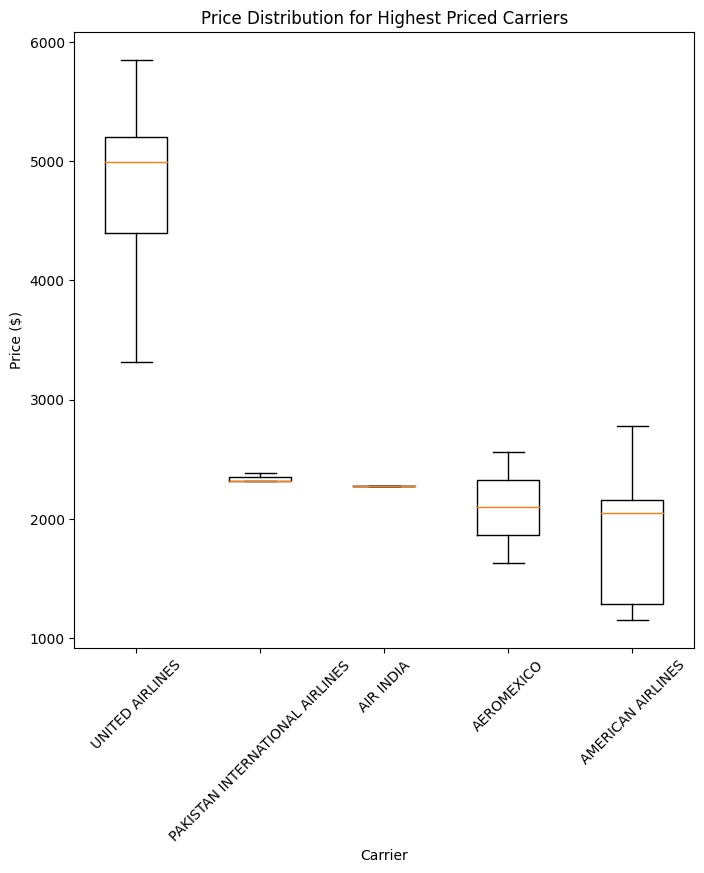

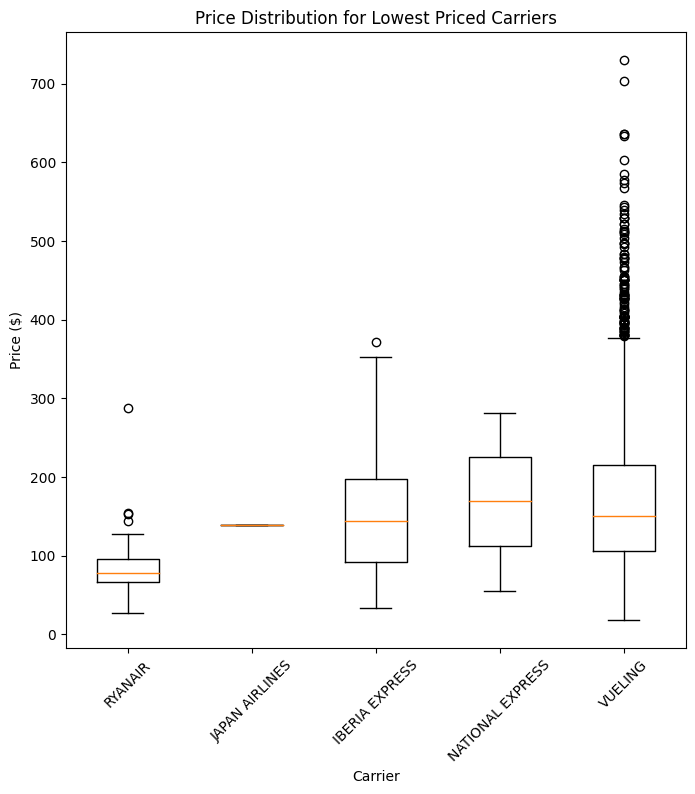

In [21]:
# Calculate the average price for each carrier
average_price_by_carrier = all_flight_carriers.groupby('Carrier')['Price'].mean()

# Filter carriers with the highest and lowest average prices
highest_priced_carriers = average_price_by_carrier.nlargest(5).index  # Adjust 5 as needed
lowest_priced_carriers = average_price_by_carrier.nsmallest(5).index  # Adjust 5 as needed

# Filter flights for the highest and lowest priced carriers
highest_priced_flights = all_flight_carriers[all_flight_carriers['Carrier'].isin(highest_priced_carriers)]
lowest_priced_flights = all_flight_carriers[all_flight_carriers['Carrier'].isin(lowest_priced_carriers)]

# Print the highest and lowest priced carriers
print("Carriers with the highest average prices:")
print(average_price_by_carrier.nlargest(5))
print("\nCarriers with the lowest average prices:")
print(average_price_by_carrier.nsmallest(5))

# Visualize the prices for the highest and lowest priced carriers
plt.figure(figsize=(8, 8))
plt.boxplot([highest_priced_flights[highest_priced_flights['Carrier'] == carrier]['Price'] for carrier in highest_priced_carriers],
            labels=highest_priced_carriers)
plt.title('Price Distribution for Highest Priced Carriers')
plt.xlabel('Carrier')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 8))
plt.boxplot([lowest_priced_flights[lowest_priced_flights['Carrier'] == carrier]['Price'] for carrier in lowest_priced_carriers],
            labels=lowest_priced_carriers)
plt.title('Price Distribution for Lowest Priced Carriers')
plt.xlabel('Carrier')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()


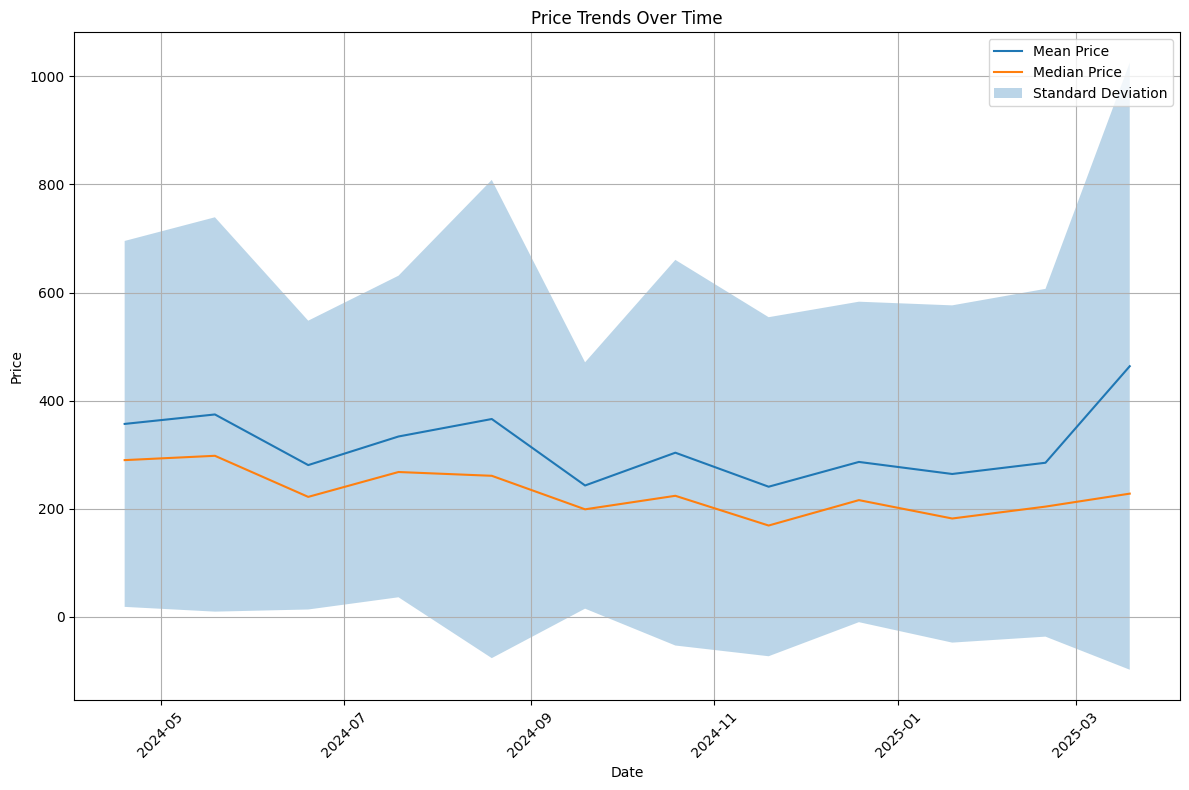

In [22]:
selected_period = (all_flight_carriers['Day'] >= '2024-04-19') & (all_flight_carriers['Day'] <= '2025-03-19')
flights_selected = all_flight_carriers[selected_period]

# Step 2: Calculate statistics over time
statistics_over_time = flights_selected.groupby('Day')['Price'].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'min', 'max', 'std'])

# Step 3: Visualization
plt.figure(figsize=(12, 8))

# Plot average price over time
plt.plot(statistics_over_time.index, statistics_over_time['mean'], label='Mean Price')
plt.plot(statistics_over_time.index, statistics_over_time['median'], label='Median Price')

# Plot standard deviation as shaded area
plt.fill_between(statistics_over_time.index,
                 statistics_over_time['mean'] + statistics_over_time['std'],
                 statistics_over_time['mean'] - statistics_over_time['std'],
                 alpha=0.3, label='Standard Deviation')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trends Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [23]:
all_flight_carriers

,Carrier,DepTime,ArrTime,Price,Day,DepAirport,ArrAirport,DayAfter,ArrivalDay,Duration
0,KLM,2024-05-19 17:55:00,2024-05-19 20:55:00,156,2024-05-19,Frankfurt,London,0,2024-05-19,180.0
1,LUFTHANSA,2024-05-19 21:30:00,2024-05-19 22:10:00,122,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
3,LUFTHANSA,2024-05-19 18:00:00,2024-05-19 18:40:00,136,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
4,LUFTHANSA,2024-05-19 17:00:00,2024-05-19 17:40:00,145,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
5,LUFTHANSA,2024-05-19 20:00:00,2024-05-19 20:40:00,148,2024-05-19,Frankfurt,London,0,2024-05-19,40.0
...,...,...,...,...,...,...,...,...,...,...
41781,WESTJET,2024-08-19 14:40:00,2024-08-19 10:55:00,1018,2024-08-19,Rome,Dublin,1,2024-08-20,1215.0
41782,AMERICAN AIRLINES,2024-08-19 12:10:00,2024-08-19 06:15:00,1234,2024-08-19,Rome,Dublin,1,2024-08-20,1085.0
41783,EMIRATES,2024-08-19 22:10:00,2024-08-19 12:15:00,1463,2024-08-19,Rome,Dublin,1,2024-08-20,845.0
41784,UNITED AIRLINES,2024-08-19 12:55:00,2024-08-19 07:05:00,3355,2024-08-19,Rome,Dublin,1,2024-08-20,1090.0


In [24]:
average_route_stats = all_flight_carriers.groupby(['DepAirport', 'ArrAirport']).agg({
    'Duration': 'mean',
    'Price': 'mean'
}).reset_index()

average_route_stats['Price'] = average_route_stats['Price'].round(2)
top_longest_routes_with_price = average_route_stats.sort_values(by='Duration', ascending=False).head()
top_longest_routes_with_price

,DepAirport,ArrAirport,Duration,Price
83,Rome,Dublin,1062.812500,2465.31
21,Dublin,Istanbul,815.304729,385.30
76,Paris,Istanbul,664.481066,321.11
3,Amsterdam,Istanbul,642.896979,347.20
49,London,Istanbul,642.725824,311.00


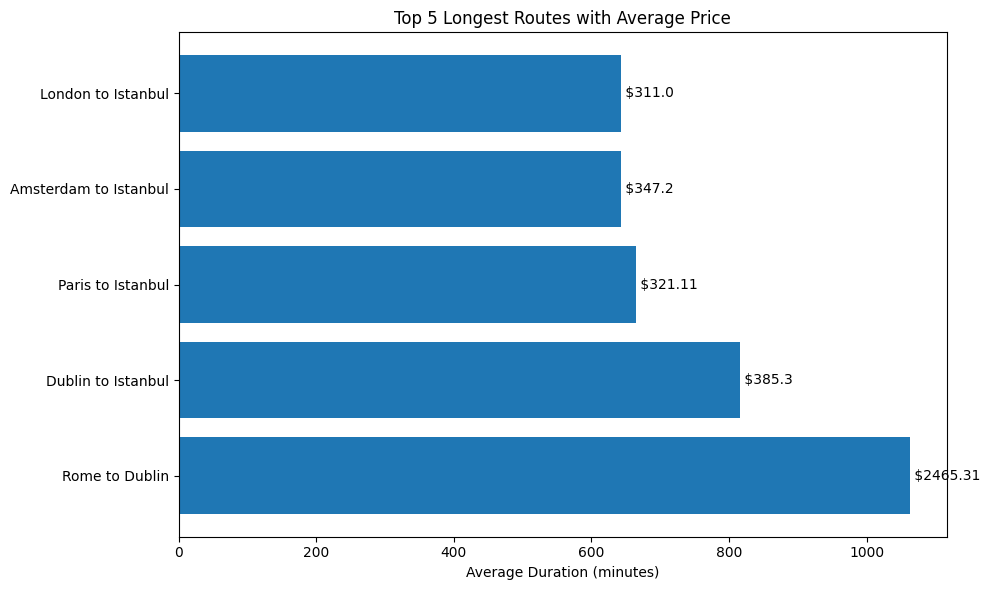

In [26]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top_longest_routes_with_price['DepAirport'] + ' to ' + top_longest_routes_with_price['ArrAirport'],
                top_longest_routes_with_price['Duration'])

for bar, price in zip(bars, top_longest_routes_with_price['Price']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f' ${price}',
             va='center', ha='left')

plt.xlabel('Average Duration (minutes)')
plt.title('Top 5 Longest Routes with Average Price')
plt.tight_layout()
plt.show()
